In [2]:
import os
import sys
import glob
import cv2
import matplotlib.pyplot as plt # 주피터 환경에서 이미지 열어주는거
import numpy as np

In [3]:
# 이미지를 전부 읽어와서 하나로 합친다.

image = cv2.imread('faces_training/face01.pgm', cv2.IMREAD_GRAYSCALE)

length, height = image.shape
image = image.reshape((1, length * height * 1))

for i in range(2,10):
    x = cv2.imread(f'faces_training/face0{i}.pgm', cv2.IMREAD_GRAYSCALE)
    temp = x.reshape((1, length * height * 1))
    image = np.concatenate([image, temp], axis=0)
    
for i in range(10,40):
    x = cv2.imread(f'faces_training/face{i}.pgm', cv2.IMREAD_GRAYSCALE)
    temp = x.reshape((1, length * height * 1))
    # print(temp.shape)
    image = np.concatenate([image, temp], axis=0)

# image = np.concatenate([x,y,z], axis=0)
print(image.shape)

(39, 32256)


In [ ]:

uu, ss, vv = np.linalg.svd(image)


In [87]:
print("####### Step1 ####")
    
def computeDimensions(img, percent=0.9):
    
    # computing eigenvalues and eigenvectors of covariance matrix
    matrix = (img - np.mean(img.T, axis=1)).T # subtract the mean (along columns)

    [eigvals, eigvec] = np.linalg.eig(np.cov(img))
    
    whole_nom_of_pc = np.size(eigvec, axis=0)
    
    eigvals = sorted(eigvals)
    eigvals = eigvals[::-1]
    
    sumvar = 0
    ssum = 0
    numPc=0
    for i in range(whole_nom_of_pc):
        sumvar += eigvals[i]
        
    for i in range(whole_nom_of_pc):
        ssum += eigvals[i]
        numPc += 1
        # print(f"현재 고유 값{i} : {eigvals[i]}")
        if(ssum/sumvar >= percent):
            print("확률 : ",ssum/sumvar)
            break
    
    print("전체 차원 수 ", whole_nom_of_pc)
    print("선택된 차원 수 ", numPc)    
    return numPc
    
perc = 0.99
numPc = computeDimensions(image, perc)
# print(f"nput Percentage: {sys.argv[1]}")
print(f"Input Percentage: {perc}")
print(f"Selected Dimansion : {numPc}")
    

####### Step1 ####
확률 :  0.9908805379144147
전체 차원 수  39
선택된 차원 수  35
Input Percentage: 0.99
Selected Dimansion : 35


In [93]:
# for step2,
# reconsturct 함수
def princomp(img, pc_limit=0):

    # computing eigenvalues and eigenvectors of covariance matrix
    matrix = (img - np.mean(img.T, axis=1)).T # subtract the mean (along columns)
    
    [eigvals,eigvecs] = np.linalg.eig(np.cov(matrix))
    
    whole_num_pc = np.size(eigvecs,axis=1)

    sortEigvals = sorted(eigvals) # 고유값을 정렬한다.
    sortEigvals = sortEigvals[::-1]       # in ascending order. 순서를 높은게 앞에 오도록 변경
    # sorting eigenvectors according to the sorted eigenvalues
    # 고유값이 정렬된 순서에 따라 대응하는 고유벡터들도 정렬한다.
    # coeff = coeff[:,sortEigvals]
    
    # eigvals = eigvals[sortEigvals] # sorting eigenvalues
    if pc_limit < whole_num_pc and pc_limit >= 0:
        eigvecs = eigvecs[:,range(pc_limit)] # 입력된 pc 개수에 따라 선택한다.
        eigvals = eigvals[:pc_limit]
        
    score = np.dot(eigvecs.T,matrix) # projection of the data in the new space
    final = np.dot(eigvecs, score).T + np.mean(img, axis=0)
    return eigvecs,score,eigvals, final

In [94]:
aa, bb, cc, dd = princomp(train, numPc)


In [95]:
final_list = []

for n in range(1,10):
    train = cv2.imread(f'faces_training/face0{n}.pgm', cv2.IMREAD_GRAYSCALE)
    
    img = (train-np.mean(train.T,axis=1)) # subtract the mean (along columns)
    
    eigenvector, score, eigenvalue, final = princomp(train, numPc)
    final_list.append(np.abs(final))
        
    error = train - np.abs(final)
    row, col = error.shape
    summ = 0
    for i in range(row):
        for j in range(col):
            s = error[i][j]*error[i][j]
            summ += s # 전체 합.

    re_error = np.abs(summ/(row*col)) # 전체합을 n으로 나누고 복소수를 float으로 전환
    print(f"Reconstructed error :{round(re_error, 4)}") # Reconstruction error 소숫점 4자리까지 보여짐

for n in range(10,40):
    train = cv2.imread(f'faces_training/face{n}.pgm', cv2.IMREAD_GRAYSCALE)
    
    img = (train-np.mean(train.T,axis=1)) # subtract the mean (along columns)
    
    eigenvector, score, eigenvalue, final = princomp(train, numPc)
    
    final_list.append(np.abs(final))
        
    error = train - final
    row, col = error.shape
    summ = 0
    for i in range(row):
        for j in range(col):
            s = error[i][j]*error[i][j]
            summ += s # 전체 합.

    re_error = np.abs(summ/(row*col)) # 전체합을 n으로 나누고 복소수를 float으로 전환
    print(f"Reconstructed error :{round(re_error, 4)}") # Reconstruction error 소숫점 4자리까지 보여짐
    
# final_list[0] 은 face01의 리컨스트럭션 이미지다.

Reconstructed error :7.7532
Reconstructed error :4.7609
Reconstructed error :7.7991
Reconstructed error :4.4086
Reconstructed error :8.8359
Reconstructed error :7.8238
Reconstructed error :5.1293
Reconstructed error :6.2315
Reconstructed error :4.9372
Reconstructed error :8.9707
Reconstructed error :5.8404
Reconstructed error :6.3594
Reconstructed error :5.0194
Reconstructed error :4.9167
Reconstructed error :5.9237
Reconstructed error :6.0573
Reconstructed error :7.0103
Reconstructed error :4.7721
Reconstructed error :5.8233
Reconstructed error :4.0049
Reconstructed error :7.9122
Reconstructed error :10.3371
Reconstructed error :6.0765
Reconstructed error :4.8758
Reconstructed error :6.5138
Reconstructed error :7.5727
Reconstructed error :8.0163
Reconstructed error :7.3028
Reconstructed error :8.7179
Reconstructed error :7.6579
Reconstructed error :3.0438
Reconstructed error :4.5028
Reconstructed error :4.413
Reconstructed error :5.1045
Reconstructed error :2.7034
Reconstructed error 

In [91]:
test01 = cv2.imread('faces_test/test04.pgm', cv2.IMREAD_GRAYSCALE)

eigenvector, score, eigenvalue, tf = princomp(test01, numPc)

print(len(final_list))
print(final_list[0].shape)

row, col = test01.shape
distances = []
for n in range(39): 
    sum_of=0
    for r in range(row):
        for c in range(col):
            sum_of += (tf[r][c]-final_list[n][r][c])**2
    distances.append(np.sqrt(sum_of))

print(distances)
found = distances.index(min(distances)) + 1
print(found)



39
(192, 168)
[7322.366629374637, 9242.028985025288, 8847.679710641927, 8463.848474724075, 10467.652405802848, 7604.5047042211845, 7923.071032393938, 7418.327728413607, 7436.599228215804, 9059.13971380162, 6055.566230518266, 6210.136566696486, 9465.12198780308, 13617.462824120215, 8540.298785215713, 8909.868654390642, 6978.690693451605, 8589.772945569304, 7707.854056260552, 7239.953264365586, 8747.904081439618, 10928.45674484435, 2571.471192736468, 8062.082155870523, 7493.096007909042, 8384.84472025335, 8907.056635750225, 8521.391953774291, 9428.773613945705, 8404.444244710827, 7346.252564170885, 9506.349235106652, 7655.851927023289, 6846.799146864423, 10582.927528383649, 7963.76362846146, 7803.262504968625, 9053.02398864699, 9358.192050776563]
23


39
(192, 168)


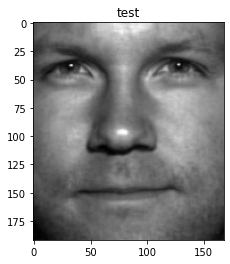

[6060.867966410977, 8702.876563077514, 7052.2327289246505, 7802.360535720006, 9762.589152461462, 7610.63127322418, 7230.299401685081, 7152.973508235817, 7331.908741556262, 9415.6007245135, 4875.2791881624125, 7789.364254722478, 7263.581369128486, 13913.884684911833, 8672.314494093065, 8696.657494364339, 7496.285676120243, 6770.096792378897, 7261.112344615298, 6617.864921502315, 7981.373444779853, 8817.487806393287, 7481.775470741738, 6610.8790731837125, 5832.048921453475, 7667.242681230532, 9784.083615618787, 8864.016355892534, 10785.091901982358, 7903.483503318646, 7170.6103783550925, 8910.844497982196, 6977.204652130943, 7178.64853966982, 9419.437322563708, 7583.675188232017, 6965.3381487902025, 6875.428446145062, 8027.779083833217]
11


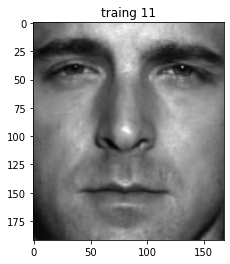

In [92]:
test01 = cv2.imread('faces_test/test01.pgm', cv2.IMREAD_GRAYSCALE)

eigenvector, score, eigenvalue, tf = princomp(test01, numPc)

print(len(final_list))
print(final_list[0].shape)

plt.title("test")
plt.imshow(tf, cmap='gray')
plt.show()

row, col = test01.shape
distances = []
for n in range(39): 
    sum_of=0
    for r in range(row):
        for c in range(col):
            sum_of += (tf[r][c]-final_list[n][r][c])**2
    distances.append(np.sqrt(sum_of))

print(distances)
found = distances.index(min(distances)) + 1
print(found)

plt.title(f"traing {found}")
plt.imshow(final_list[found-1], cmap='gray')
plt.show()

